##**Ejercicio 6**

Trabajas en el departamento de Atención al Cliente, posees la data de los tickets ( solicitudes ) 
recibidas y procesadas, en Mayo dos empleados se fueron de la empresa. Tu colega quiere 
presentar este gráfico al jefe para contarle de la situación. Analiza la data, has un listado de los 
problemas que encuentras, haciendo uso de la técnica de data-link ratio y los Principios del 
Diseño Analítico reconstruye el mismo tal que cuente una historia de una manera clara y 
placentera. Los datos se encuentran en ticket_trend.json adjunta a esta guía de ejercicios

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [3]:
df=pd.read_json('ticket_trend.json')
df.head(5)

,Ticket_Type,Number_of_Tickets,Date
0,Received,160,2019-01-01
1,Received,184,2019-02-01
2,Received,241,2019-03-01
3,Received,149,2019-04-01
4,Received,180,2019-05-01


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=pd.DatetimeIndex(df['Date']).month_name()
df.head(5)


,Ticket_Type,Number_of_Tickets,Date,Month
0,Received,160,2019-01-01,January
1,Received,184,2019-02-01,February
2,Received,241,2019-03-01,March
3,Received,149,2019-04-01,April
4,Received,180,2019-05-01,May


In [5]:
NewDf=df.pivot(index=['Date','Month'], columns='Ticket_Type', values='Number_of_Tickets').reset_index().sort_values(by=['Date'])
NewDf['Porcentaje tickets procesados']=(NewDf['Processed']/NewDf['Received'])*100
NewDf

Ticket_Type,Date,Month,Processed,Received,Porcentaje tickets procesados
0,2019-01-01,January,160,160,100.000000
1,2019-02-01,February,184,184,100.000000
2,2019-03-01,March,237,241,98.340249
3,2019-04-01,April,148,149,99.328859
4,2019-05-01,May,181,180,100.555556
5,2019-06-01,June,150,161,93.167702
6,2019-07-01,July,123,132,93.181818
7,2019-08-01,August,156,202,77.227723
8,2019-09-01,September,126,160,78.750000
9,2019-10-01,October,104,139,74.820144


**Listado de problemas**

1. Los atributos de percepción no son los más adecuados dado que las cifras en algunas barras están superpuestas unas sobre otras, por lo que se debe dedicar más tiempo para comprender el dato

2. Al representar una evolución temporal, la gráfica de barras no sería la apropiada si no una gráfica de líneas, esto mejora también el atributo de percepción.

3. No está regularizado y los ejes están dados por líneas oscuras. 

4. Las lineas horizontales no son necesarias.

5. No es claro el conocimiento que se desea proporcionar en la gráfica.




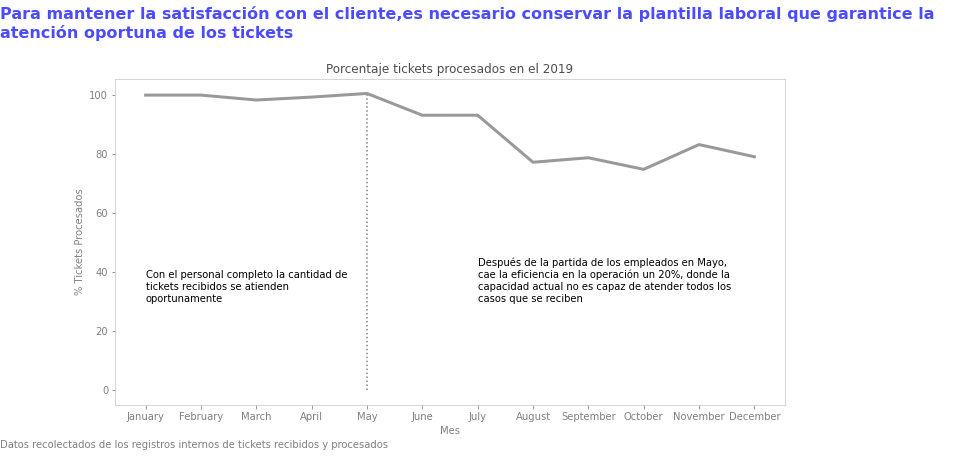

In [6]:
fig = plt.gcf()
fig.set_size_inches(12, 6, forward=True)
ax = plt.axes()

plt.plot(NewDf['Month'],NewDf['Porcentaje tickets procesados'], color='0.6', linewidth=3)

plt.vlines(x='May',ymin=0, ymax=100, linestyles='dotted', colors='0.5' )
plt.ylabel('% Tickets Procesados', fontdict={'color':'0.5'});
plt.xlabel('Mes',fontdict={'color':'0.5'});
plt.title('Porcentaje tickets procesados en el 2019', fontdict={'color':'0.3'});

ax.spines['bottom'].set_color('0.8')
ax.spines['top'].set_color('0.8')
ax.spines['right'].set_color('0.8')
ax.spines['left'].set_color('0.8')
ax.tick_params(axis='x', colors='0.5')
ax.tick_params(axis='y', colors='0.5')

plt.text('July', 30, 'Después de la partida de los empleados en Mayo,\n\
cae la eficiencia en la operación un 20%, donde la\n\
capacidad actual no es capaz de atender todos los \n\
casos que se reciben')

plt.text('January', 30, 'Con el personal completo la cantidad de\n\
tickets recibidos se atienden\n\
oportunamente')

ax.annotate("Datos recolectados de los registros internos de tickets recibidos y procesados", xy=(0, 0),  xycoords='figure points',
                  xytext=(0, 10), textcoords='figure points', color='gray')

ax.annotate("Para mantener la satisfacción con el cliente,es necesario conservar la plantilla laboral que garantice la \natención oportuna de los tickets", 
            xy=(0, 0),  xycoords='figure points', xytext=(0, 420), textcoords='figure points', color='blue', alpha=0.7, weight='heavy', size=16)

plt.show()


##**Ejercicio 7**
 
Nuestro departamento de Ciencias de la Universidad ha realizado un Programa para promover 
la Ciencia en estudiantes de bachillerato. Ahora desean presentar los resultados de las 
encuestas realizadas antes y después al comité de financiamiento para que se pueda volver a 
repetir el programa. Tus colegas quieren presentar este gráfico que se muestra a continuación. 
Analiza la data. Haciendo uso de la técnica de data-link ratio y los Principios del Diseño 
Analítico cómo crees que presentarías los resultados para comunicar el éxito del programa 
realizado. Los datos se encuentran en encuestas.json adjunta a esta guía de ejercicios 

In [8]:
df1=pd.read_json('encuestas.json')
df1.head(5)

,Opinion,When,Percentage
0,Bored,Before,11
1,Not great,Before,5
2,Ok,Before,40
3,Kind of interested,Before,25
4,Excited,Before,19


**Listado de problemas**

1. En el planteamiento propuesto, debo analizar ambas gráficas, característica por característica para determinar si el programa fue favorable o no.

2. Los tonos de azul pueden confundir a un daltonico, particularmente para uno de los integrantes del equipo es dificil notar la diferencia.

3. El área definida por la figura de pastel no es clara para que por sí misma pueda deducir el valor de la participación en porcentaje, por lo que es necesario agragar más información para hacer la gráfica más clara.

4. 




In [9]:
Opinion=df1['Opinion'].unique()
Opinion

array(['Bored', 'Not great', 'Ok', 'Kind of interested', 'Excited'],
      dtype=object)

In [10]:
W=df1['When'].unique()
W

array(['Before', 'After'], dtype=object)

In [13]:
NewDf1=df1.pivot(index=['Opinion'], columns='When', values='Percentage').reset_index()
NewDf1['Delta Porcentaje']=(NewDf1['After'] -NewDf1['Before'])
NewDf1=NewDf1.sort_values(by=['Delta Porcentaje'])
NewDf1

When,Opinion,After,Before,Delta Porcentaje
4,Ok,14,40,-26
0,Bored,12,11,1
3,Not great,6,5,1
2,Kind of interested,30,25,5
1,Excited,38,19,19


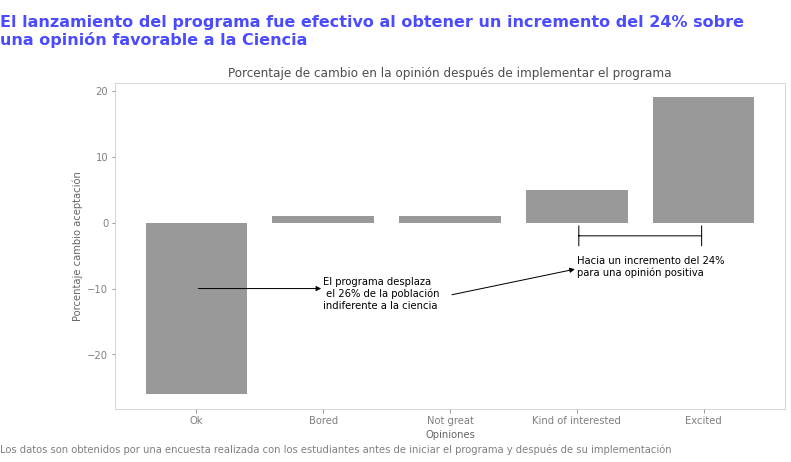

In [77]:
fig = plt.gcf()
fig.set_size_inches(12, 6, forward=True)
ax = plt.axes()

plt.bar(NewDf1['Opinion'],NewDf1['Delta Porcentaje'], color='0.6', linewidth=3)

#plt.vlines(x='May',ymin=0, ymax=100, linestyles='dotted', colors='0.5' )
plt.ylabel('Porcentaje cambio aceptación', fontdict={'color':'0.4'});
plt.xlabel('Opiniones\n',fontdict={'color':'0.4'});
plt.title('\n\n\n\nPorcentaje de cambio en la opinión después de implementar el programa', fontdict={'color':'0.3'});

ax.spines['bottom'].set_color('0.8')
ax.spines['top'].set_color('0.8')
ax.spines['right'].set_color('0.8')
ax.spines['left'].set_color('0.8')
ax.tick_params(axis='x', colors='0.5')
ax.tick_params(axis='y', colors='0.5')


texto='El programa desplaza\n el 26% de la población\nindiferente a la ciencia'

plt.text('Bored', -13, texto)
ax.annotate('', xy=('Bored', -10), xytext=('Ok', -10),
            arrowprops=dict(facecolor='black',arrowstyle='-|>'))

texto1='Hacia un incremento del 24%\npara una opinión positiva'

plt.text('Kind of interested', -8, texto1)
ax.annotate('', xy=('Excited', -2), xytext=('Kind of interested', -2),
            arrowprops=dict(facecolor='black', arrowstyle='|-|'))

ax.annotate('', xy=('Kind of interested', -7), xytext=('Not great', -11),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))

texto3='El lanzamiento del programa fue efectivo al obtener un incremento del 24% sobre\nuna opinión favorable a la Ciencia\n'
ax.annotate(texto3, xy=(0, 0),  xycoords='figure points', xytext=(0, 400), textcoords='figure points', 
            color='blue', alpha=0.7, weight='heavy', size=16)

ax.annotate("\n\nLos datos son obtenidos por una encuesta realizada con los estudiantes antes de iniciar el programa y después de su implementación", xy=(0, 0),  xycoords='figure points',
                  xytext=(0, 10), textcoords='figure points', color='gray')
plt.show()